<a href="https://colab.research.google.com/github/Eminent01/Baum-Tenpers-Research/blob/main/BaumTenper_Research2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as date

In [ ]:
#Import the dataset for the analysis 
# data = pd.read_csv("/content/drive/MyDrive/NSE 30 Historical Data.csv" , thousands =',')

In [ ]:
data.head(5)

,Price
Date,
2021-12-31,1722.30
2021-12-30,1677.48
2021-12-29,1677.67
2021-12-24,1700.61
2021-12-23,1698.44


In [ ]:
# # # Import the dataset for the analysis 
data = pd.read_csv("/content/drive/MyDrive/NSE All Share Historical Data.csv" , thousands =',')

In [ ]:
# Reindex data using a DatetimeIndex
data.set_index(pd.DatetimeIndex(data['Date']), inplace=True)
# Keep only the 'Adj Close' Value
data = data[['Price']]
# Re-inspect data
print(data)

               Price
Date                
2021-12-30  41813.27
2021-12-29  41807.10
2021-12-24  42262.85
2021-12-23  42230.48
2021-12-22  42244.22
...              ...
2012-02-03  20877.64
2012-02-02  20822.00
2012-02-01  20790.88
2012-01-31  20875.83
2012-01-30  20731.72

[2456 rows x 1 columns]


Text(0, 0.5, 'Stock Price')

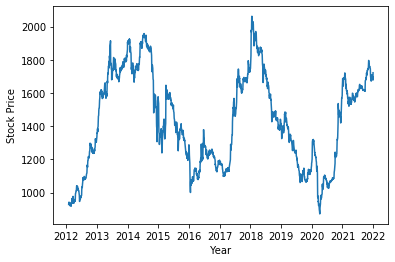

In [ ]:
plt.plot(data)
plt.xlabel(" Year ")
plt.ylabel("Stock Price")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


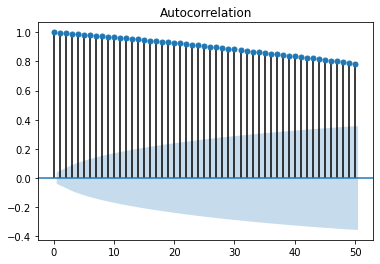

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plot_acf(data["Price"], lags=50)
# Show the AR as a plot
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS

In [ ]:
# X =np.arange(len(data[['Price']]))
# Y = np.asarray(data[['Price']])
# X = sm.add_constant(X)
  
# # Fit the ordinary least square method.
# ols_res = OLS(Y,X).fit()
# # apply durbin watson statistic on the ols residual
# durbin_watson(ols_res.resid)

In [ ]:
# def Logreturns(data):
#   data['Price'] = np.log10(data['Price']/data['Price'].shift(1))
#   return data

In [ ]:
# data2 = Logreturns(data)

In [ ]:
# plot_acf(data2["Price"], lags=50)
# # Show the AR as a plot
# plt.show()

In [ ]:
! pip install pandas-ta

In [ ]:
import pandas_ta

In [ ]:
log=pd.DataFrame(data.ta.log_return(close='Price').dropna())

In [ ]:
# log=pd.DataFrame(data.ta.linreg(close='Price').dropna())

In [ ]:
log.head(5)

,LOGRET_1
Date,
2021-12-29,-0.000148
2021-12-24,0.010842
2021-12-23,-0.000766
2021-12-22,0.000325
2021-12-21,0.003411


Text(0, 0.5, 'Stock Price')

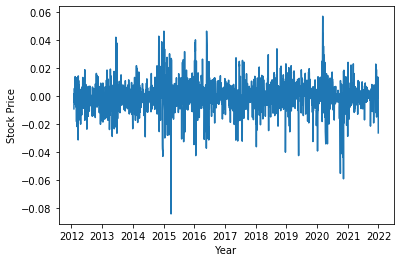

In [ ]:
plt.plot(log)
plt.xlabel(" Year ")
plt.ylabel("Stock Price")

In [ ]:
log.describe()

,LOGRET_1
count,2455.000000
mean,-0.000286
std,0.009868
min,-0.079848
25%,-0.004484
50%,0.000043
75%,0.004163
max,0.050329


In [ ]:
# log.to_csv("log_data.csv")

In [ ]:
log.ta.ema(close='LOGRET_1', length=10, append=True)
log.head(3)

,LOGRET_1,EMA_10
Date,,
2021-12-29,-0.000148,NaN
2021-12-24,0.010842,NaN
2021-12-23,-0.000766,NaN


In [ ]:
# log.ta.linreg(close='LOGRET_1', lenght= 10, append =True)

In [ ]:
data2= log.iloc[10:]
data2.head(5)

,LOGRET_1,EMA_10
Date,,
2021-12-13,0.002209,0.001383
2021-12-10,-0.012531,-0.001147
2021-12-09,-0.004733,-0.001799
2021-12-08,0.017831,0.001770
2021-12-07,-0.009857,-0.000344


In [ ]:
# Drop the first n-rows
# data2 = log.iloc[10:]
# data2.head(5)

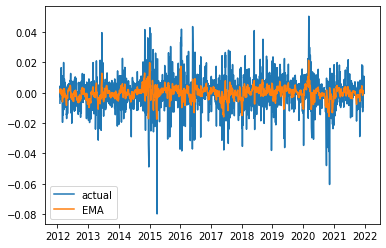

In [ ]:
plt.plot(log["LOGRET_1"], label="actual")
plt.plot(data2["EMA_10"], label= "EMA")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


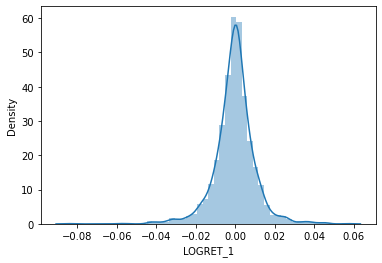

In [ ]:
sns.distplot(log['LOGRET_1'])

In [ ]:
# n_points = len(data2)
# train_points = int((2/3)*n_points)+1
# X_train, X_test =data2['LOGRET_1'].values[:train_points],  data2["LOGRET_1"].values[train_points:  ]
# y_train, y_test =data2["LR_14"].values[:train_points  ],  data2["LR_14"].values[train_points:  ]

array([-0.00080425,  0.00294382, -0.01501454, ...,  0.00610382,
        0.00331883, -0.01194537])

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [ ]:
# X = data2.iloc[:,:-1]
# # # del X['Vol.']
# # #X del (labels = 'Vol.', axis =0)
# y = data2.iloc[:, -1]

In [ ]:
#Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(data2[["LOGRET_1"]], data2[["EMA_10"]], test_size=.3, shuffle= False)

In [ ]:
X_train

,LOGRET_1
Date,
2017-03-01,0.006318
2016-01-06,0.002843
2021-09-24,0.003873
2018-08-10,0.001686
2015-04-08,-0.011540
...,...
2021-01-20,0.002479
2016-07-19,0.009259
2017-09-19,-0.006664


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train_lr= lr.predict(X_train)
print("Train error :", np.sqrt(mean_squared_error(y_train,pred_train_lr)))
pred_test_lr= lr.predict(X_test)
print("Test Error:", np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print(f' Rsquare:{r2_score(y_train, pred_train_lr)}')
print(f'Rsquare:{r2_score(y_test, pred_test_lr)}')
print(f'MAE:{mean_absolute_error(y_train, pred_train_lr)}')
print(f'MAE:{mean_absolute_error(y_test, pred_test_lr)}')

Train error : 0.0033702712659267747
Test Error: 0.0031576119099307686
 Rsquare:0.35559387746104265
Rsquare:0.35566836080460273
MAE:0.002405008663830383
MAE:0.002289711774435449


In [ ]:
LinearPredict = lr.predict(X_test)

In [ ]:
# plt.plot(LinearPredict, label='predicted')
# plt.plot(y_train, label ='actual')
# plt.legend()

In [ ]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train) 
pred_train_ridge= ridge.predict(X_train)
print("Train error: ", np.sqrt(mean_squared_error(y_train,pred_train_ridge)))
pred_test_ridge= ridge.predict(X_test)
print("Test error: ",np.sqrt(mean_squared_error(y_test,pred_test_ridge))) 
print(r2_score(y_train, pred_train_ridge))
print(r2_score(y_test, pred_test_ridge))
print(f'MAE:{mean_absolute_error(y_train, pred_train_ridge)}')
print(f'MAE:{mean_absolute_error(y_test, pred_test_ridge)}')

Train error:  0.0033729859352185135
Test error:  0.0031623103316260437
0.3545553533169369
0.3537494460481485
MAE:0.002403410137414144
MAE:0.002293503689665635


In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("Train error:",np.sqrt(mean_squared_error(pred_train_lasso,y_train)))
pred_test_lasso= model_lasso.predict(X_test)
print("Test error:",  np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_train, pred_train_lasso))
print(r2_score(y_test, pred_test_lasso))
print(f'MAE:{mean_absolute_error(y_train, pred_train_lasso)}')
print(f'MAE:{mean_absolute_error(y_test, pred_test_lasso)}')

Train error: 0.004198411748929602
Test error: 0.003944380694481026
0.0
-0.005424823346111163
MAE:0.0029786731268395786
MAE:0.0028606721092416343


In [ ]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print("Train error: ", np.sqrt(mean_squared_error(y_train,pred_train_enet)))
pred_test_enet= model_enet.predict(X_test)
print("Test error:",np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_train, pred_train_enet))
print(r2_score(y_test, pred_test_enet))
print(f'MAE:{mean_absolute_error(y_train, pred_train_enet)}')
print(f'MAE:{mean_absolute_error(y_test, pred_test_enet)}')

Train error:  0.004198411748929602
Test error: 0.003944380694481026
0.0
-0.005424823346111163
MAE:0.0029786731268395786
MAE:0.0028606721092416343
